In [108]:
import pandas as pd
import numpy as np
import torch

In [109]:
df=pd.read_csv('insurance.csv')

In [110]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [111]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [112]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [113]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

,missing_value,%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


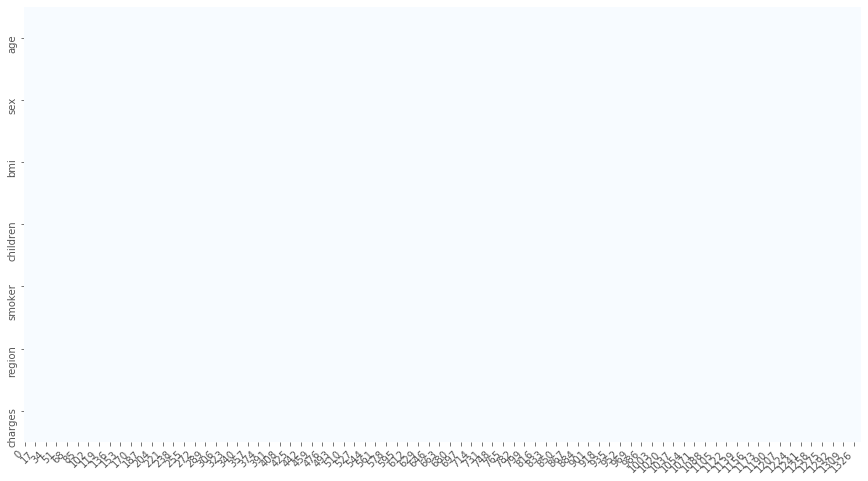

In [114]:

plot_missing_value(df,return_df=True)

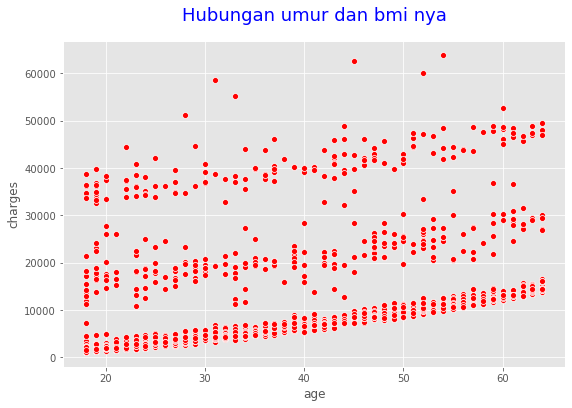

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='age', y = 'charges', data=df, ax=ax, color='red')

ax.set_title('Hubungan umur dan bmi nya', pad=20, size=18, color='blue')

plt.savefig('manual_scaterplot.png')

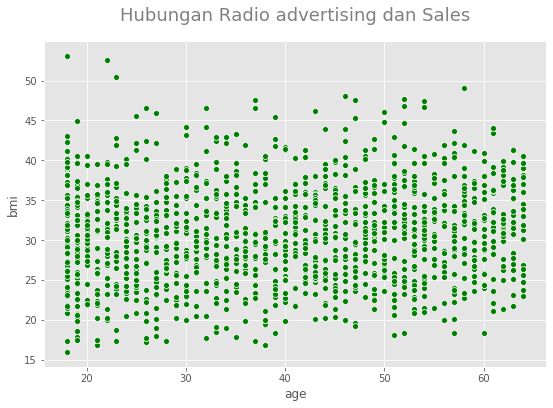

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='age', y = 'bmi', data=df, ax=ax, color='green')

ax.set_title('Hubungan Radio advertising dan Sales', pad=20, size=18, color='gray')

plt.savefig('manual_scaterplot2.png')

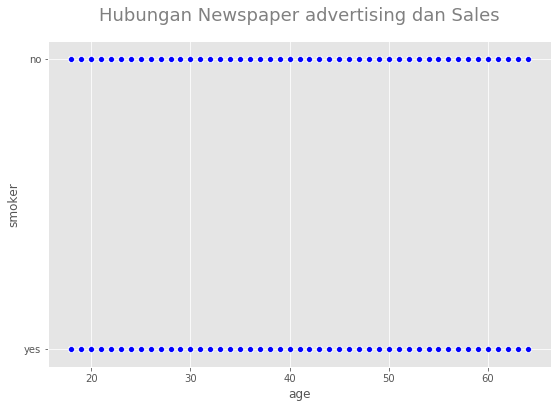

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='age', y = 'smoker', data=df, ax=ax, color='blue')

ax.set_title('Hubungan Newspaper advertising dan Sales', pad=20, size=18, color='gray')

plt.savefig('manual_scaterplot3.png')

In [118]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
df['smoker']=df.smoker.replace({'no':0,'yes':1})
df['sex']=df.sex.replace({'female':0,'male':1})
df['region']=df.region.replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3})

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [122]:
X = df.drop(columns="charges")
y = df.charges #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((802, 6), (536, 6), (802,), (536,))

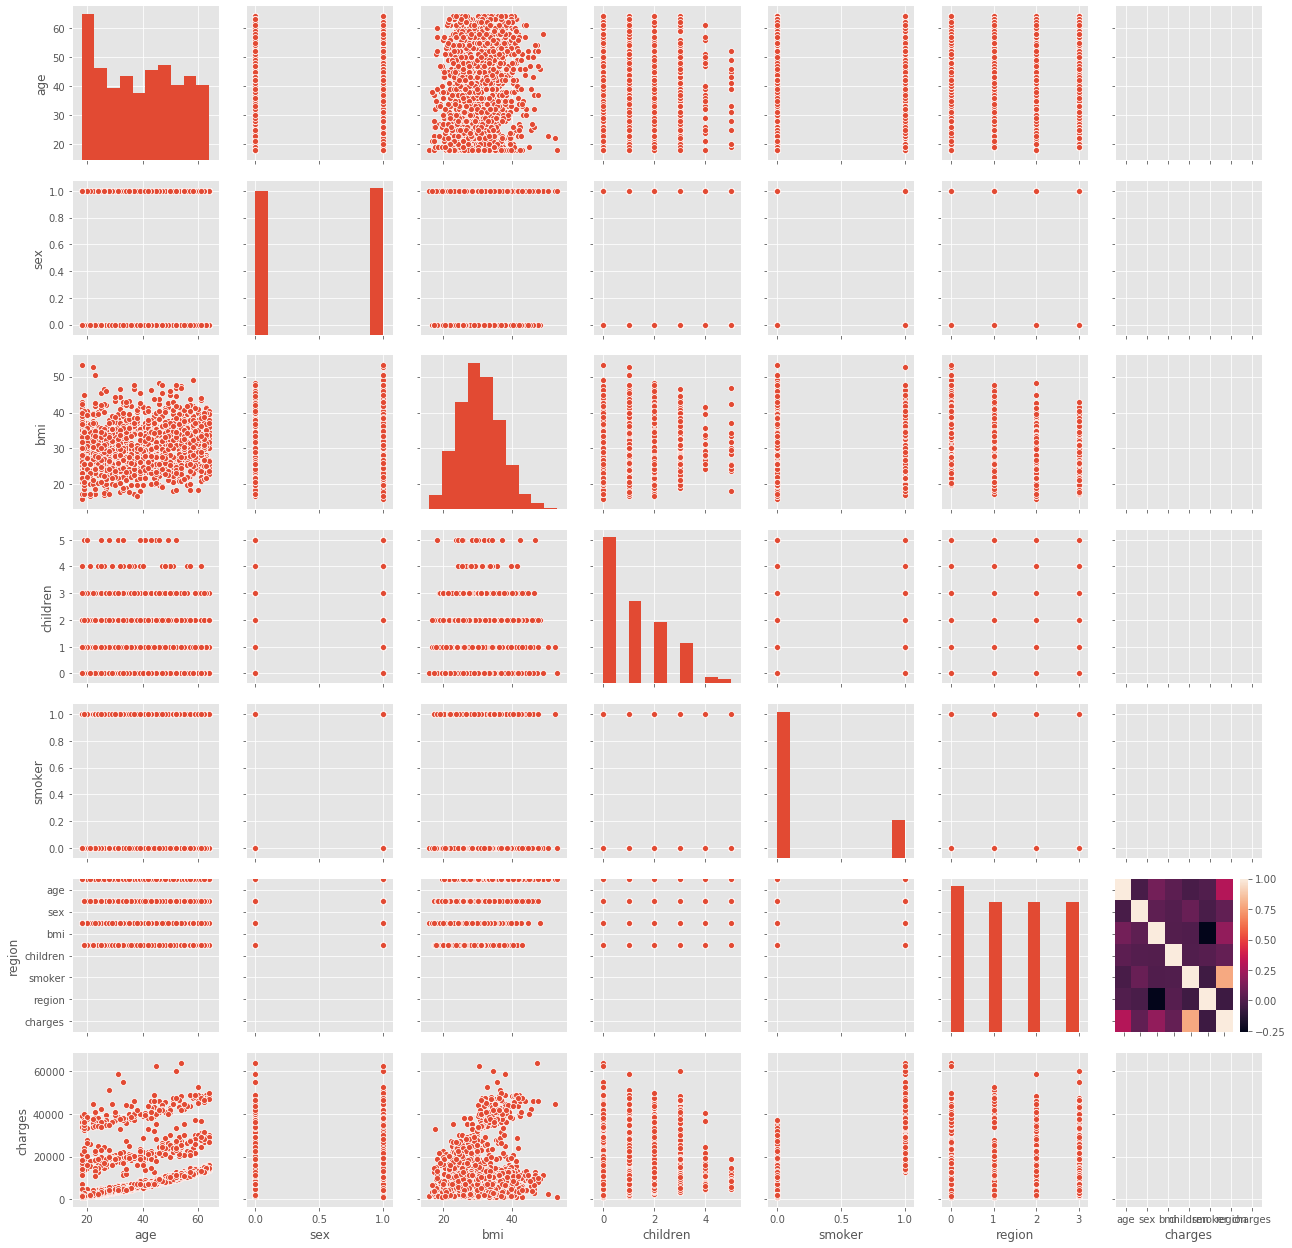

In [123]:
import seaborn as sns
df.describe()
sns.pairplot(df)
sns.heatmap(df.corr())

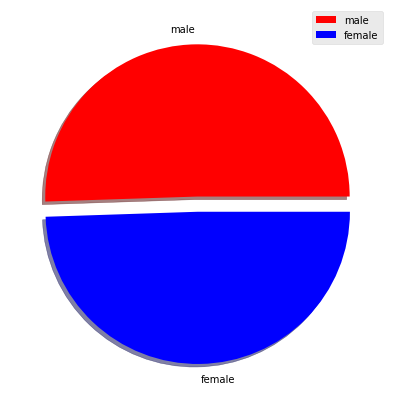

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
size=df['sex'].value_counts()
label=['male','female']
color=['Red','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

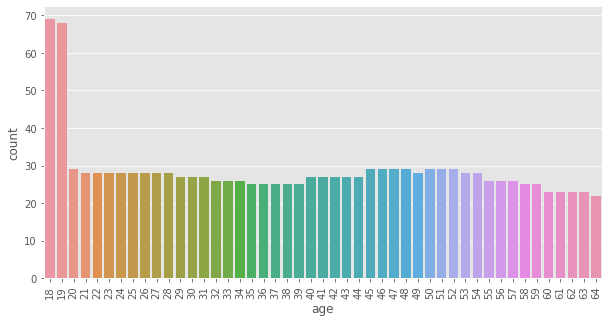

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(df['age'])
plt.xticks(rotation=90)
X = df.drop(columns=['charges'], axis=1)
y = df.charges
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [126]:
# Split the data - 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
def result (y_pred_train, y_pred_test,y_train,y_test):
    print("train results")
    print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_pred_train), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_train, y_pred_train), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_train, y_pred_train), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_train, y_pred_train), 2)) 
    print("R2 score =", round(sm.r2_score(y_train, y_pred_train), 2))
    print("test results")
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))


In [127]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
from sklearn import svm
svr_model = svm.SVR(gamma='scale')
svr_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [129]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [130]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [131]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [132]:
# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [133]:
evaluate(lin_model, X_test, y_test)
evaluate(svr_model, X_test, y_test)
evaluate(rf_model, X_test, y_test)

evaluate(regressor, X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Average Error       : 4030.1011 degrees
Variance score R^2  : 76.18%
Accuracy            : 59.86%

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Average Error       : 8281.9824 degrees
Variance score R^2  : -11.57%
Accuracy            : -3.92%

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False) 

Average Error       : 2631.4459 degrees
Variance score R^2  : 85.10%
Acc

In [134]:
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
Accuracy: -4273.49 (+/- 836.65) degrees
R^2: 0.74 (+/- 0.07) degrees
SVR Model:
Accuracy: -8408.76 (+/- 1551.98) degrees
R^2: -0.11 (+/- 0.11) degrees
Random Forest Model:
Accuracy: -2777.53 (+/- 539.02) degrees
R^2: 0.82 (+/- 0.07) degrees
Linear Model:
Accuracy: -4273.49 (+/- 836.65) degrees
R^2: 0.74 (+/- 0.07) degrees
SVR Model:
Accuracy: -8408.76 (+/- 1551.98) degrees
R^2: -0.11 (+/- 0.11) degrees


In [135]:
print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Random Forest Model:
Accuracy: -2777.53 (+/- 539.02) degrees
R^2: 0.82 (+/- 0.07) degrees


In [136]:
save_model(rf_model, "rf_model2.pkl")

Model is pickled as model/rf_model2.pkl
